### 1D Random Walk with a 1D state-space model consisting of 
- update model for states
- observation model 

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
import importlib
# mpl_toolkits = importlib.import_module('mpl_toolkits')
# from mpl_toolkits.mplot3d import Axes3D
initVariance = 10
vkVar = 3 # noise in measurement
wkVar = 5 # noise in samples
n = 100

def updateX(xk, wk):
    xnext = xk + np.random.normal(0, np.sqrt(wk))
    return xnext

x0 = np.random.normal(0, initVariance)

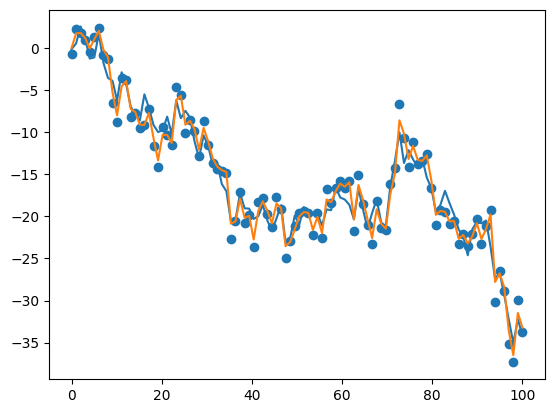

In [89]:
t = np.linspace(0, n, n)

x = [x0]
for i in range(1, n):
    x.append(updateX(x[-1], wkVar))

fig = plt.figure()
axis = fig.add_subplot()
axis.plot(t, x)

observations = np.array(x) + np.random.normal(0, np.sqrt(vkVar), (n,))

axis.scatter(t, observations)

priorX = 0
priorVar = initVariance
finalXhat = [priorX]
finalVariances = [initVariance]
#Bayes Updates
Kalman = priorVar / (priorVar + vkVar)
for i in range(1, n):
    posteriorX = priorX + (Kalman * (observations[i] - priorX))
    posteriorVar = priorVar - ((priorVar ** 2) / (priorVar + vkVar))
    finalXhat.append(posteriorX)
    finalVariances.append(posteriorVar)
    priorX = posteriorX
    priorVar = posteriorVar + wkVar
axis.plot(t, finalXhat)
plt.show()

Kalman Filter calculates final variance as  2.1097722286464435


Text(0.5, 0, 'log of time (Log(s))')

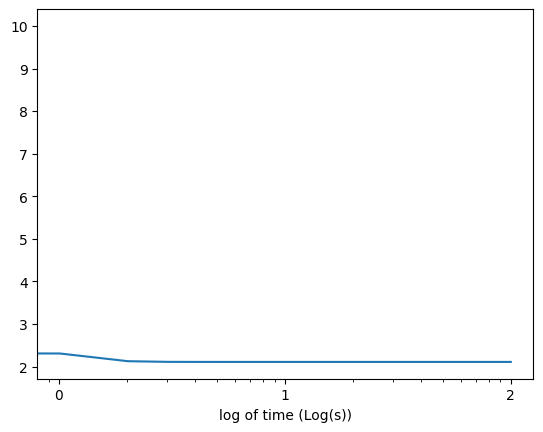

In [90]:
import matplotlib as mpl

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
f1 = mpl.ticker.ScalarFormatter()
f1.set_scientific(False)
ax.xaxis.set_major_formatter(f1)

f2 = mpl.ticker.StrMethodFormatter('{x:.0f}')
ax.xaxis.set_major_formatter(f2)

print("Kalman Filter calculates final variance as ", finalVariances[-1])
plt.semilogx(t, finalVariances)
plt.xticks(ticks=[1, 10, 100], labels=[0, 1, 2])
plt.xlabel("log of time (Log(s))")